**Importing Dependencies**

In [2]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import numpy as np
import os
import pywt

**Reading all Images from directory**

In [3]:
image_dir = os.getcwd()

#Image list
loaded_images = []
reference_images= []

for filename in os.listdir(image_dir):
    # Checking if the file is an image
    if filename.endswith(('.jpg')):

        file_path = os.path.join(image_dir, filename)
        
        # Loading the image
        image = cv2.imread(file_path)
        
        # Appending the loaded image to the list
        loaded_images.append(image)
        reference_images.append(loaded_images)

**Image 1**

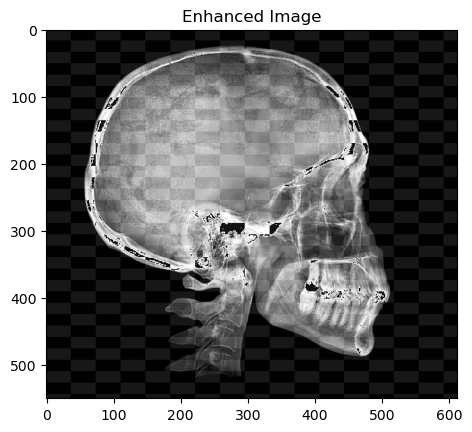

In [33]:
image = loaded_images[0] 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
iterations = 3

for _ in range(iterations):
        image = cv2.fastNlMeansDenoising(image)


plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Enhanced Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


plt.show()

**Image 2**

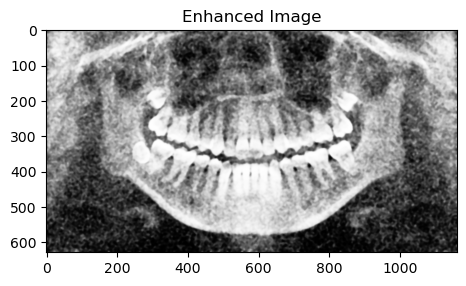

In [41]:
noisy_image = loaded_images[1]

#Gaussian denoising 5 times
i = 0
while (i != 5):
    denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
    noisy_image=denoised_image
    i = i + 1

#Histogram equalization for contrast enhancement 
enhanced_image = cv2.equalizeHist(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY))

enhanced_image = cv2.medianBlur(enhanced_image,5)


plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Enhanced Image')
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))


plt.show()


**Image 3**

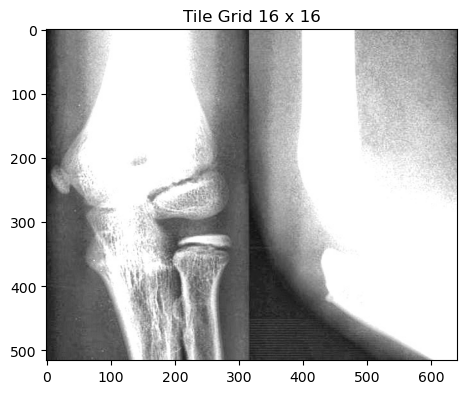

In [63]:
image = loaded_images[2]

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (16, 16))
matched_image = clahe.apply(gray_image)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Tile Grid 16 x 16')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))


plt.show()


**Image 4**

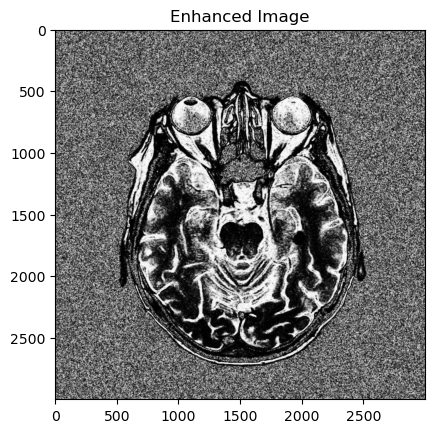

In [57]:
# Load the noisy image
fractal_noisy_image = loaded_images[3]

# Gaussian denoising (you can adjust the parameters as needed)
i = 0
while i != 3:
    denoised_image = cv2.GaussianBlur(fractal_noisy_image, (5, 5), 0)
    fractal_noisy_image = denoised_image
    i += 1

# Convert the denoised image to grayscale
denoised_gray = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)

# Histogram equalization for contrast enhancement
denoised_enhanced = cv2.equalizeHist(denoised_gray)

# Smoothing using bilateral filter
smoothed = cv2.bilateralFilter(denoised_enhanced, d = 9, sigmaColor=75, sigmaSpace=75)

# Applying gamma correction to the smoothed image
gamma = 1.5 
gamma_corrected = np.uint8(cv2.pow(smoothed / 255.0, gamma) * 255.0)



plt.title('Enhanced Image')
plt.imshow(gamma_corrected, cmap='gray')

plt.show()


**Image 5**

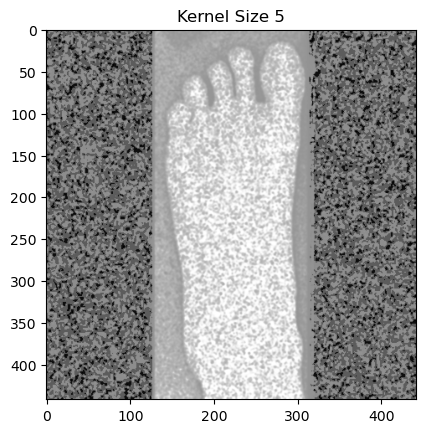

In [47]:
fractal_noisy_image = loaded_images[4]

# Gaussian denoising

denoised_image = cv2.GaussianBlur(fractal_noisy_image, (5, 5), 0)

# Histogram equalization for contrast enhancement 
denoised_enhanced = cv2.equalizeHist(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY))

# Smoothing
enhanced_image = cv2.medianBlur(denoised_enhanced, 5)

plt.title('Enhanced Image')
plt.imshow(denoised_enhanced, cmap='gray')

plt.show()


**Functions**

In [10]:
def color_enhancement(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    a_channel = cv2.equalizeHist(a_channel)
    b_channel = cv2.equalizeHist(b_channel)

    enhanced_lab_image = cv2.merge((l_channel, a_channel, b_channel))
    enhanced_image = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2BGR)

    return enhanced_image

def histogram_matching(image, reference_image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    matched_image = clahe.apply(gray_image)

    return matched_image

def dynamic_range_compression(image, lower_percentile=1, upper_percentile=99):
    lower_bound = np.percentile(image, lower_percentile)
    upper_bound = np.percentile(image, upper_percentile)
    compressed_image = np.clip((image - lower_bound) / (upper_bound - lower_bound), 0, 1) * 255
    return compressed_image.astype(np.uint8)


def wavelet_denoising(image, wavelet_type='haar', level=1):
    coeffs = pywt.wavedec2(image, wavelet_type, level=level)
    coeffs = [pywt.threshold(detail, 0.1 * np.max(detail), mode="soft") for detail in coeffs[1:]]
    return pywt.waverec2(coeffs, wavelet_type)

def gaussian_smoothing(image, kernel_size=(5, 5), sigma=0):
    return cv2.GaussianBlur(image, kernel_size, sigma)

def histogram_equalization(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.equalizeHist(gray_image)

def gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def anisotropic_diffusion(image, iterations=1):
    for _ in range(iterations):
        image = cv2.fastNlMeansDenoising(image)
    return image

def wavelet_denoising(image, wavelet_type='db1', level=1):
    coeffs = pywt.wavedec2(image, wavelet_type, level=level)
    coeffs = [pywt.threshold(detail, 0.1 * np.max(detail), mode="soft") for detail in coeffs[1:]]
    return pywt.waverec2(coeffs, wavelet_type)

def adaptive_enhancement(image, method='CLAHE', clip_limit=2.0, tile_grid=(8, 8)):
    if method == 'CLAHE':
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        enhanced_image = clahe.apply(gray_image)
    
    return enhanced_image

def linear_contrast_adjustment(image, alpha=1.0, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def non_local_means_denoising(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

def unsharp_mask_filter(image, kernel_size=(5, 5), sigma=1.0, alpha=1.5):
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = cv2.addWeighted(image, alpha, blurred, -alpha, 0)
    return sharpened

def median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

def denoising(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)


In [11]:
def result():
    # Create subplots for each enhanced image
    plt.figure(figsize=(15, 15))

    plt.subplot(4, 5, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(4, 5, 2)
    plt.title('Enhanced Color')
    plt.imshow(cv2.cvtColor(enhanced_color_image, cv2.COLOR_BGR2RGB))

    plt.subplot(4, 5, 3)
    plt.title('Histogram Matched')
    plt.imshow(matched_image, cmap='gray')

    plt.subplot(4, 5, 4)
    plt.title('Dynamic Range Compressed')
    plt.imshow(compressed_image, cmap='gray')

    plt.subplot(4, 5, 5)
    plt.title('Wavelet Denoised')
    plt.imshow(denoised_image, cmap='gray')

    plt.subplot(4, 5, 6)
    plt.title('Gaussian Smoothing')
    plt.imshow(smoothed_image, cmap='gray')

    plt.subplot(4, 5, 7)
    plt.title('Histogram Equalized')
    plt.imshow(equalized_image, cmap='gray')

    plt.subplot(4, 5, 8)
    plt.title('Gamma Corrected')
    plt.imshow(gamma_corrected_image, cmap='gray')

    plt.subplot(4, 5, 9)
    plt.title('Median Filtered')
    plt.imshow(filtered_image, cmap='gray')

    plt.subplot(4, 5, 10)
    plt.title('Anisotropic Diffusion Denoised')
    plt.imshow(denoised_image, cmap='gray')

    plt.subplot(4, 5, 11)
    plt.title('Wavelet Denoised (db1)')
    plt.imshow(denoised_image, cmap='gray')

    plt.subplot(4, 5, 12)
    plt.title('Adaptive Enhancement (CLAHE)')
    plt.imshow(enhanced_image, cmap='gray')

    plt.subplot(4, 5, 13)
    plt.title('Linear Contrast Adjusted')
    plt.imshow(contrast_adjusted_image, cmap='gray')

    plt.subplot(4, 5, 14)
    plt.title('Non-local Means Denoised')
    plt.imshow(denoised_image, cmap='gray')

    plt.subplot(4, 5, 15)
    plt.title('Unsharp Mask Filtered')
    plt.imshow(sharpened_image, cmap='gray')

    plt.subplot(4, 5, 16)
    plt.title('Median Filtered (Kernel 5)')
    plt.imshow(filtered_image, cmap='gray')

    plt.subplot(4, 5, 17)
    plt.title('Denoised (Non-local Means)')
    plt.imshow(denoised_image, cmap='gray')

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()


**Playground**

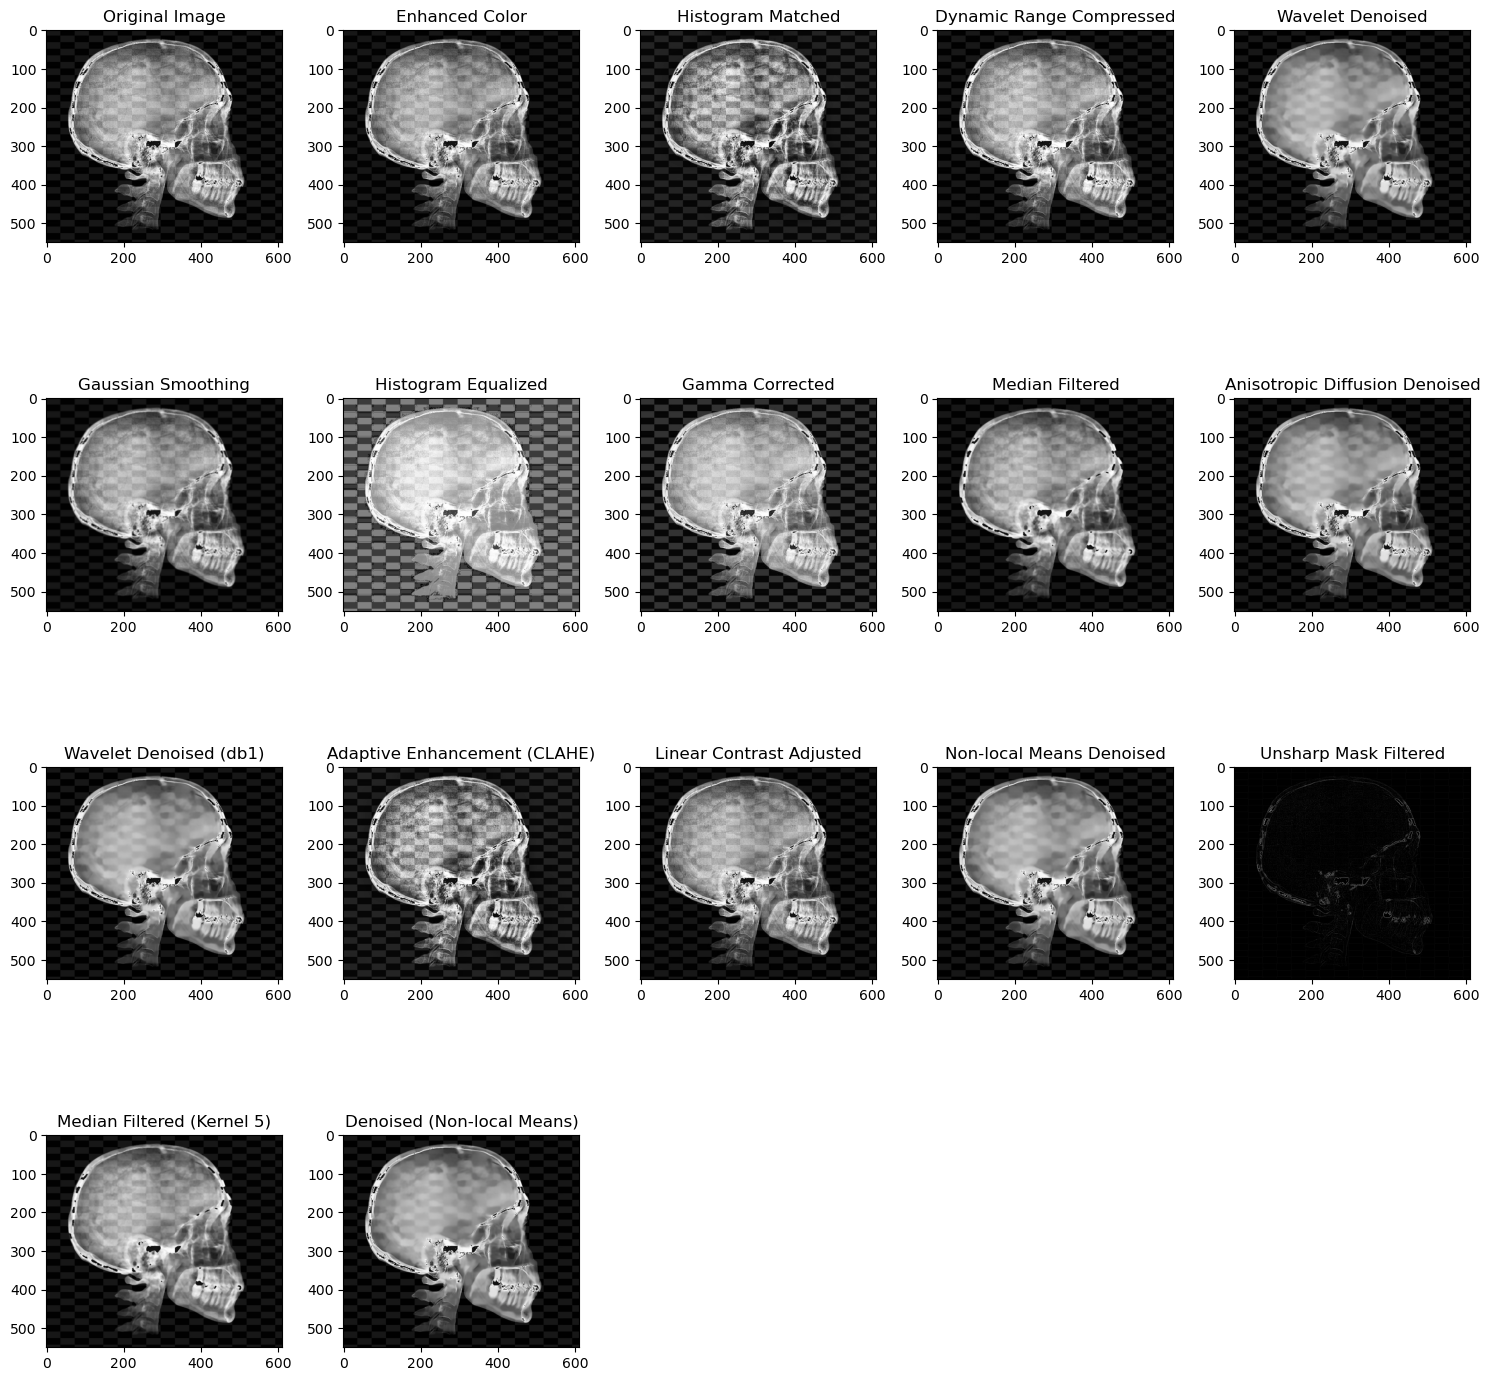

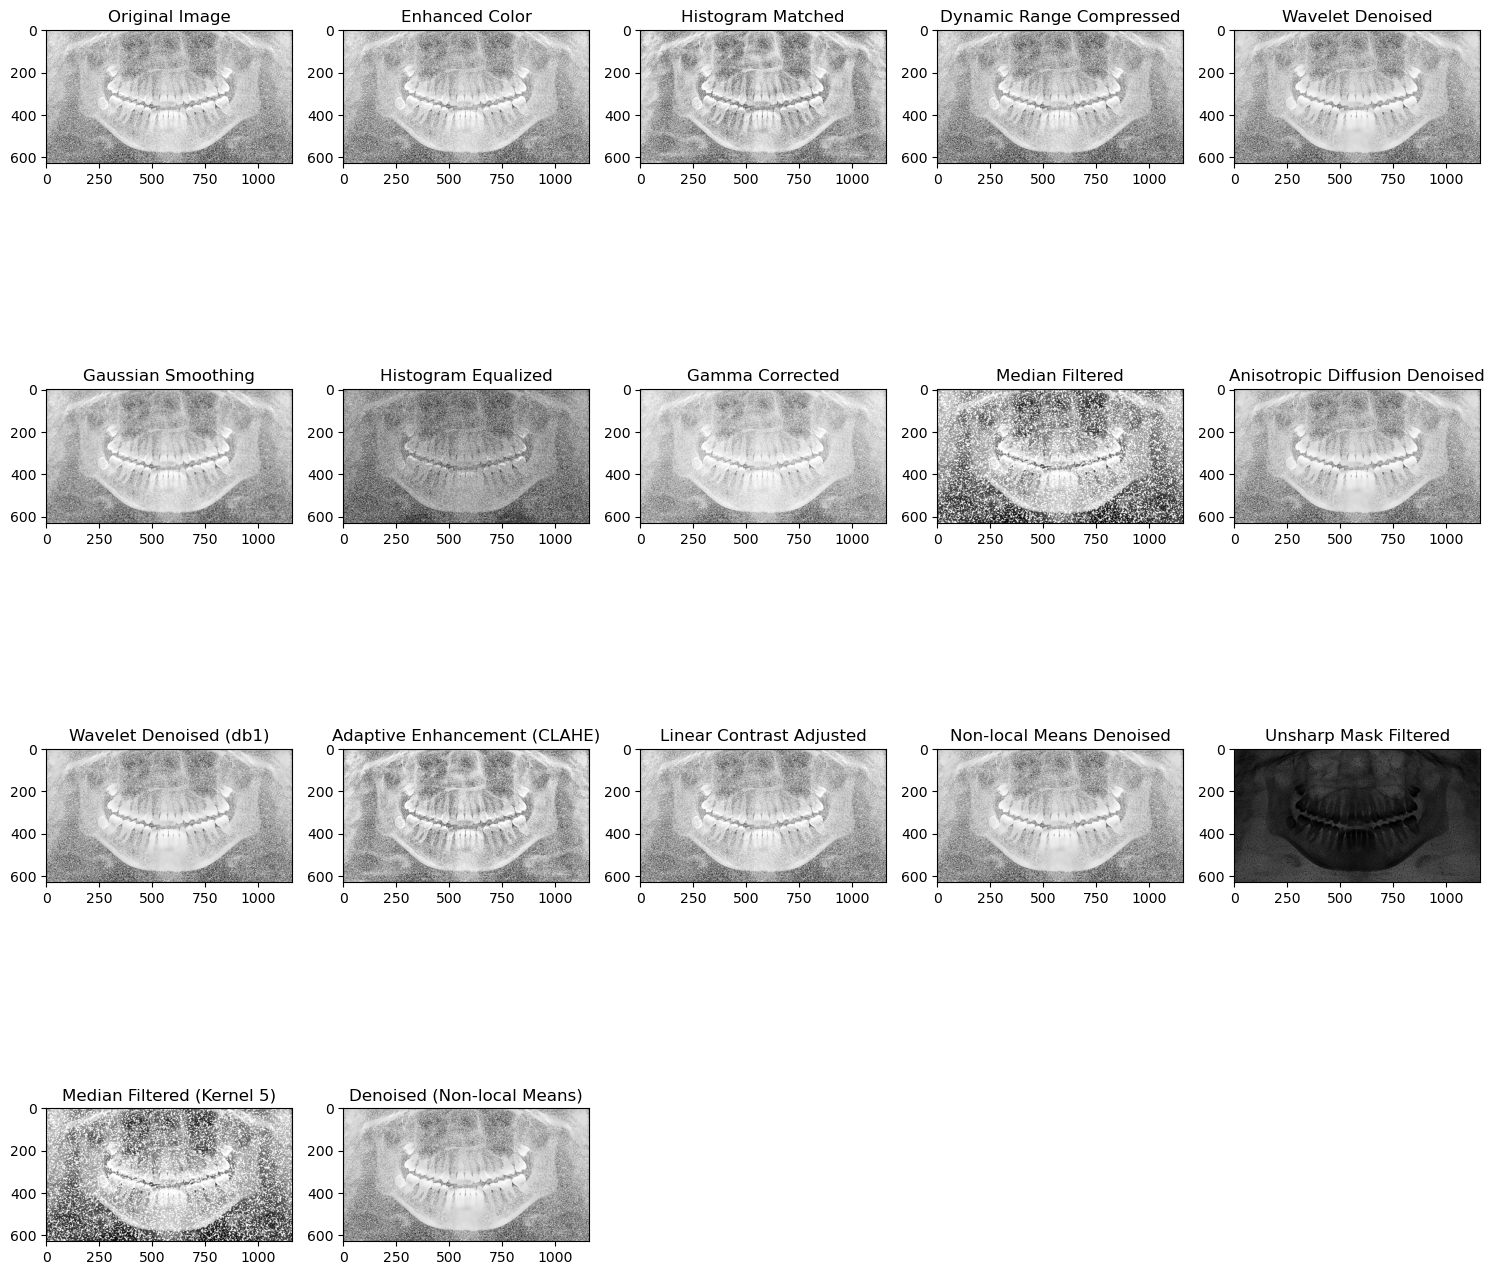

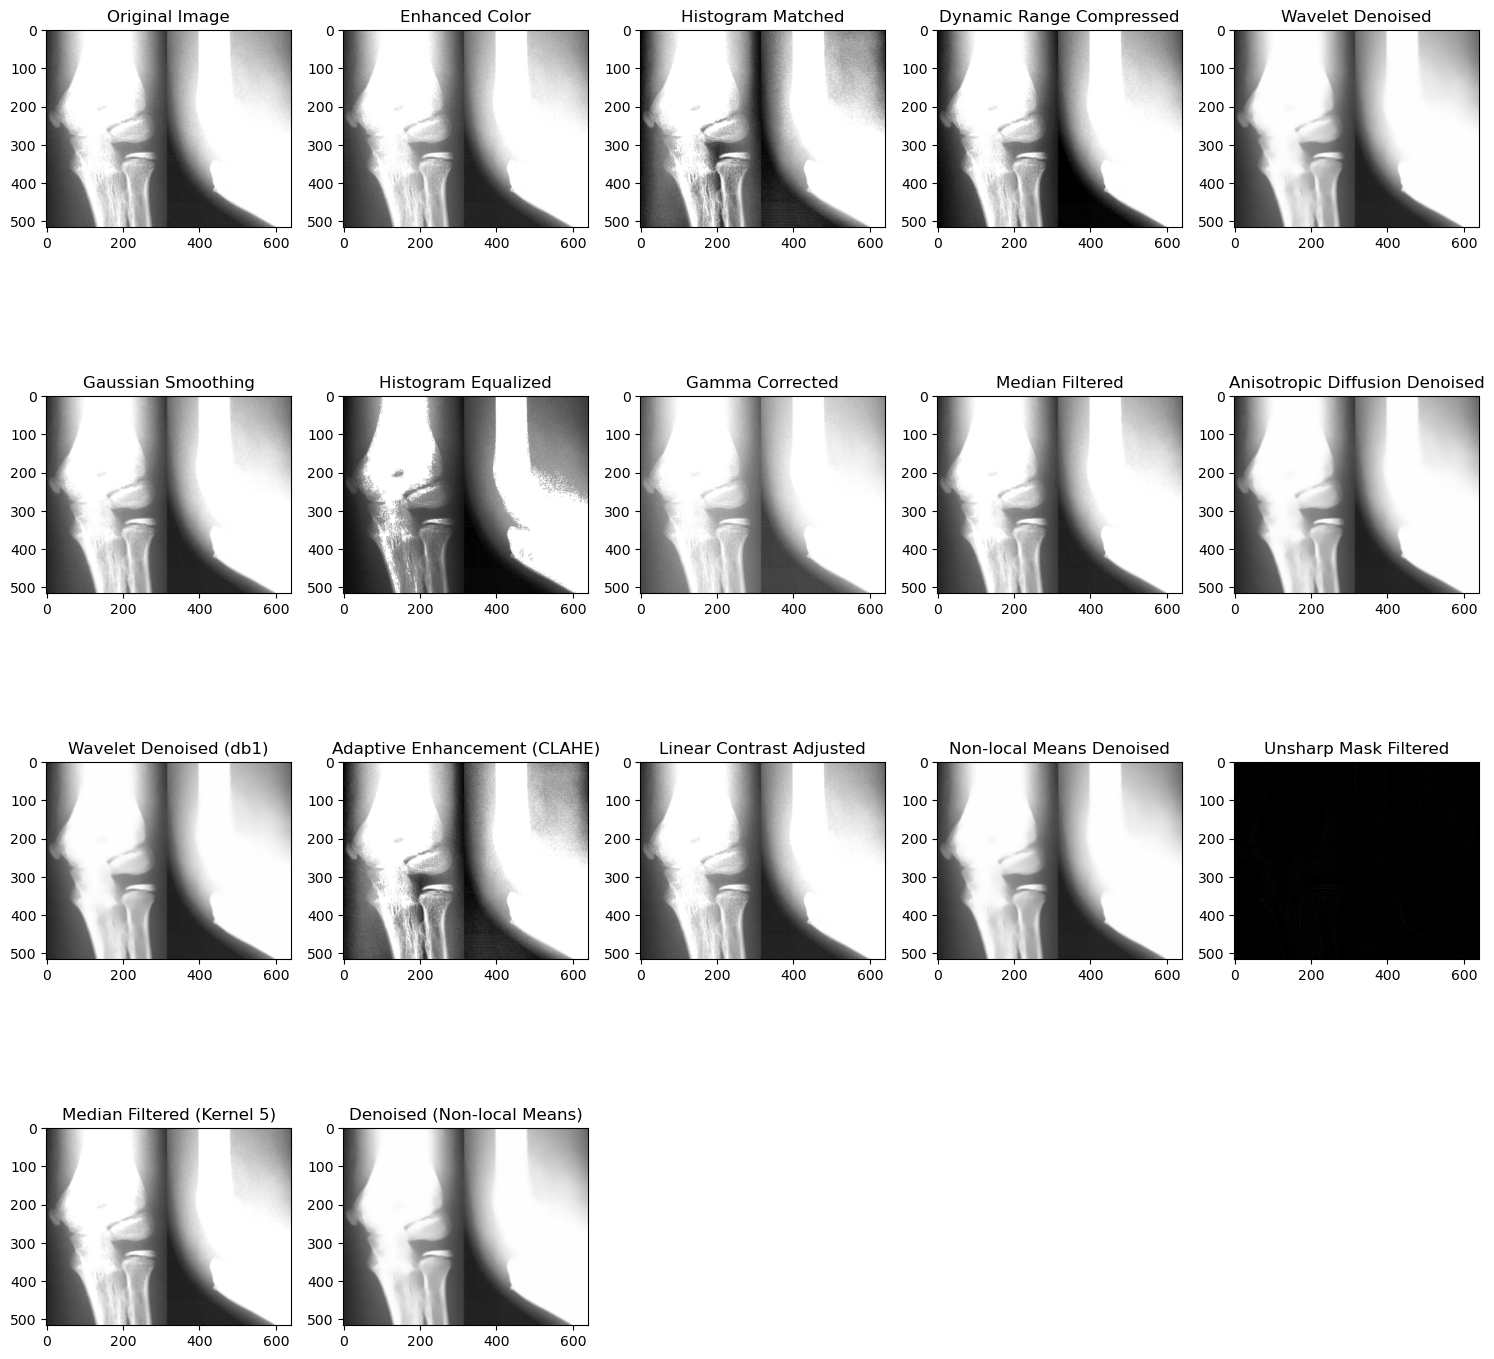

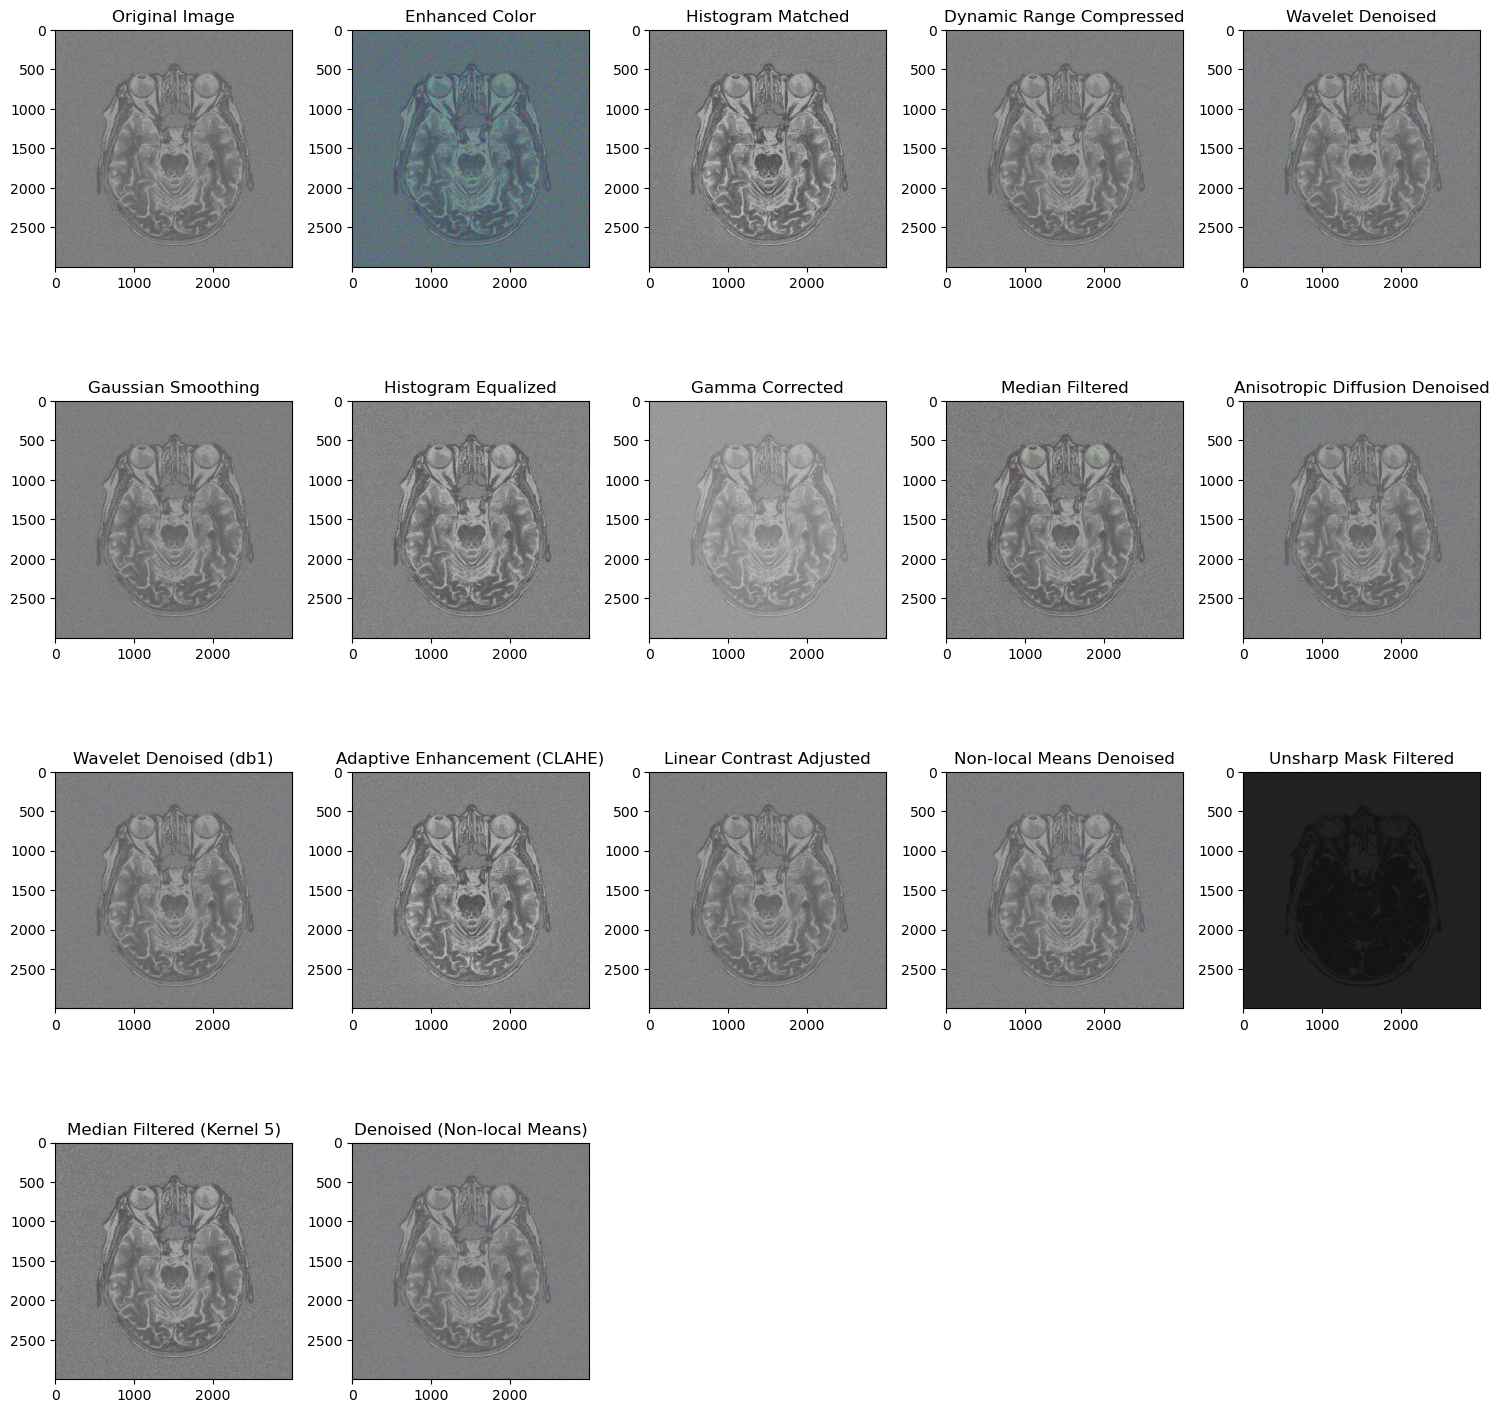

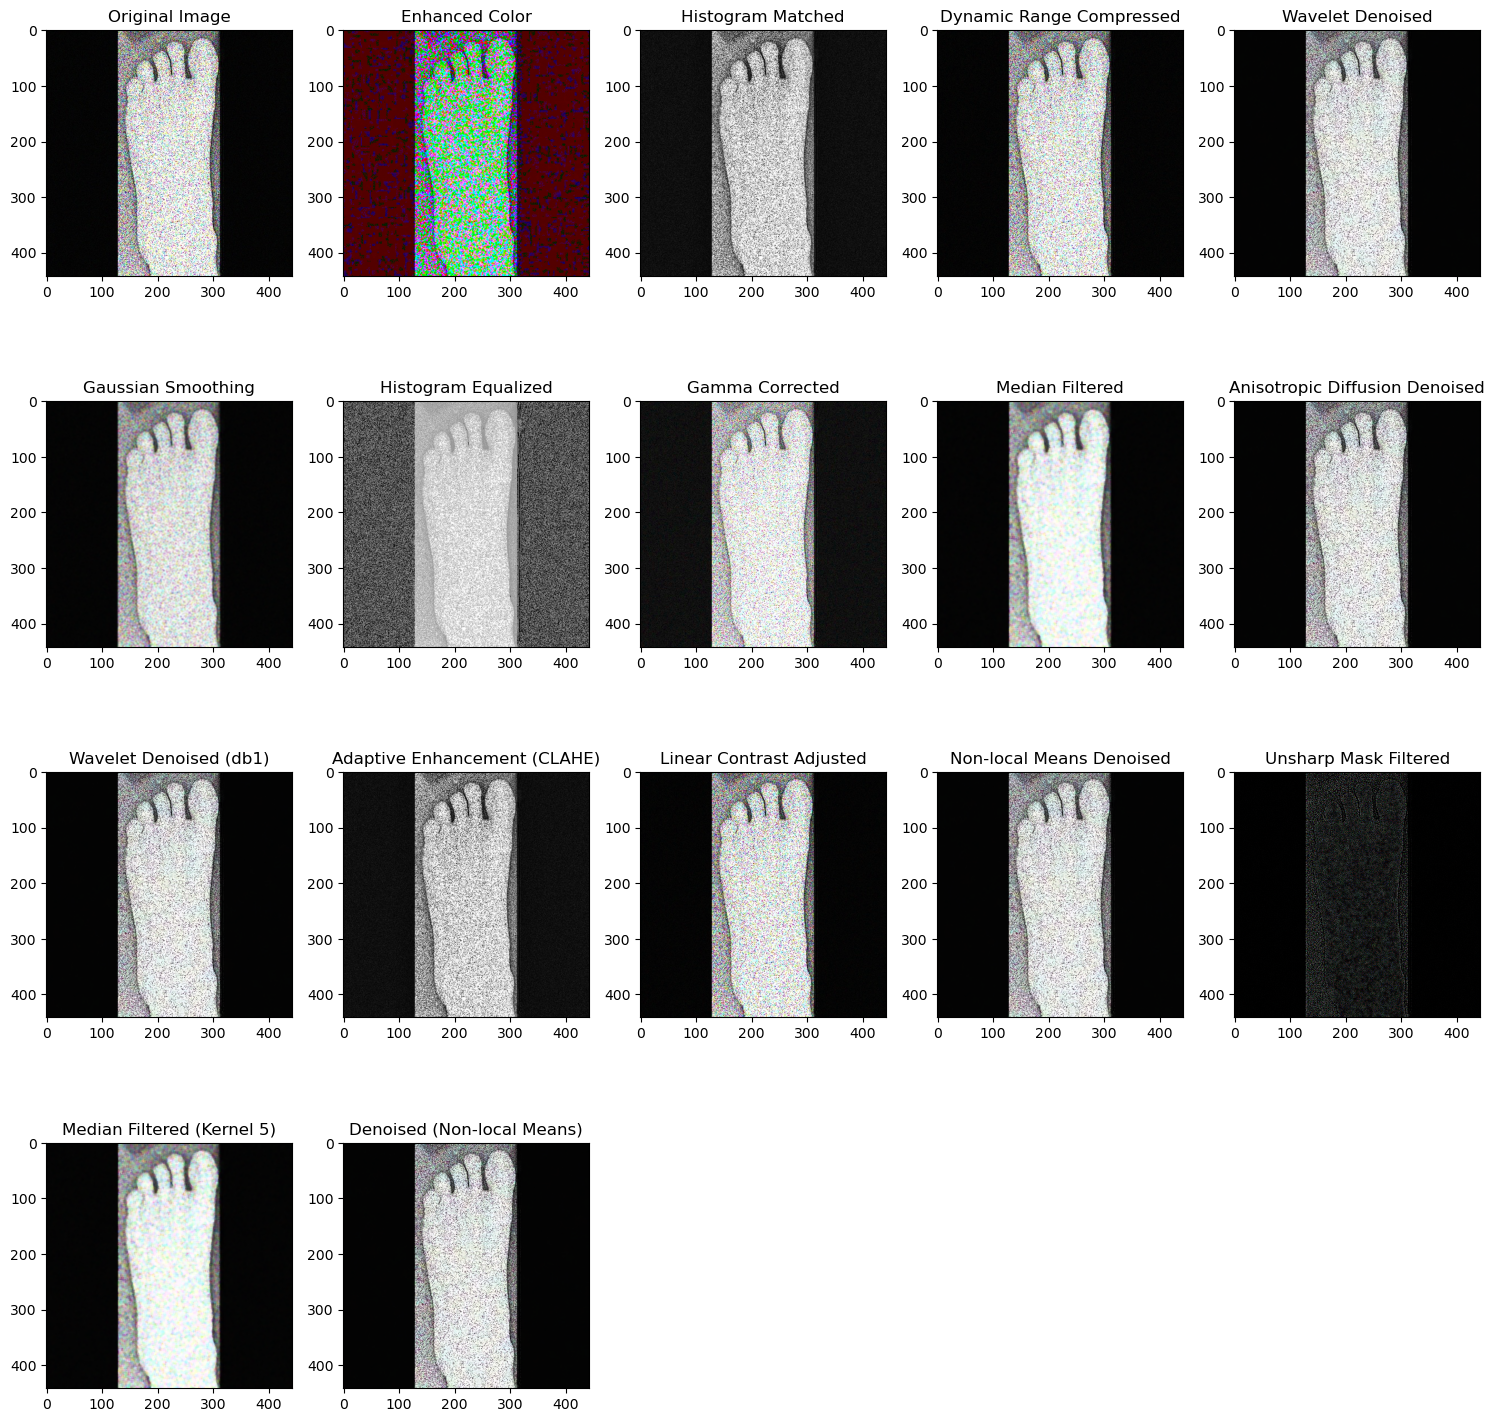

In [12]:
for i in range (0, 5):
    image = loaded_images[i]
    # Color Enhancement
    enhanced_color_image = color_enhancement(image)
    # Histogram Matching
    matched_image = histogram_matching(image, reference_images[i])
    # Dynamic Range Compression
    compressed_image = dynamic_range_compression(image, lower_percentile=1, upper_percentile=99)
    # Wavelet Denoising
    denoised_image = wavelet_denoising(image, wavelet_type='haar', level=1)
    # Gaussian Smoothing
    smoothed_image = gaussian_smoothing(image, kernel_size=(5, 5), sigma=0)
    # Histogram Equalization
    equalized_image = histogram_equalization(image)
    # Gamma Correction:
    gamma_corrected_image = gamma_correction(image, gamma=1.5)
    # Median Filtering
    filtered_image = median_filter(image, kernel_size=3)
    # Noise Reduction
    denoised_image = anisotropic_diffusion(image, iterations=1)
    # Wavelet Denoising
    denoised_image = wavelet_denoising(image, wavelet_type='db1', level=1)
    # Adaptive Enhancement
    enhanced_image = adaptive_enhancement(image, method='CLAHE', clip_limit=2.0, tile_grid=(8, 8))
    # Linear Contrast Adjustment
    contrast_adjusted_image = linear_contrast_adjustment(image, alpha=1.0, beta=0)
    # Non-local Means Denoising
    denoised_image = non_local_means_denoising(image)
    # Unsharp Mask Filtering
    sharpened_image = unsharp_mask_filter(image, kernel_size=(5, 5), sigma=1.0, alpha=1.5)
    # Median Filtering
    filtered_image = median_filter(image, kernel_size=5)
    # Denoising (Non-local Means)
    denoised_image = denoising(image)
    
    result()
    